# Binary Classification

## Look at the data

Load the data from the csv-files

In [3]:
import pandas as pd

train = pd.read_csv('../titanic_data/train.csv')
test = pd.read_csv('../titanic_data/test.csv')

In [4]:
# Listing The shapes of the Titanic datasets
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


In [5]:
# Listing The structure of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Listing The structure of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [7]:
# Listing Look at the data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Section Data Preparation and Cleaning


In [8]:
# Listing Cope with missing values
# option 1
# We only have two passengers without it. This is bearable
train = train.dropna(subset=["Embarked"])    

# option 2
# We only have very few information about the cabin, let's drop it
train = train.drop("Cabin", axis=1)       

# option 3
# The age misses quite a few times. But intuition
# says it might be important for someone's chance to survive.
mean = train["Age"].mean()
train["Age"] = train["Age"].fillna(mean)     

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [9]:
# Listing Unique values in columns
print('There are {} different (unique) PassengerIds in the data'
    .format(train["PassengerId"].nunique()))
print('There are {} different (unique) names in the data'
    .format(train["Name"].nunique()))
print('There are {} different (unique) ticket numbers in the data'
    .format(train["Ticket"].nunique()))

There are 889 different (unique) PassengerIds in the data
There are 889 different (unique) names in the data
There are 680 different (unique) ticket numbers in the data


In [10]:
# Listing Remove identifying data
train = train.drop("PassengerId", axis=1)
train = train.drop("Name", axis=1)
train = train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [11]:
# Listing Transforming textual data into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    le.fit(train[col])
    train[col] = le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [12]:
# Listing The maximum values
print('The maximum age is {}'.format(train["Age"].max()))
print('The maximum fare is {}'.format(train["Fare"].max()))

The maximum age is 80.0
The maximum fare is 512.3292


In [13]:
# Listing Normalization of the data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'
    .format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [14]:
# Listing Separating input from labels and training from testing sets
from sklearn.model_selection import train_test_split

input_data = train[:, 1:8]
labels = train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(
    input_data, labels, test_size = 0.2)

print('We have {} training and {} testing rows'.format(train_input.shape[0], test_input.shape[0]))
print('There are {} input columns'.format(train_input.shape[1]))

We have 711 training and 178 testing rows
There are 7 input columns


In [15]:
# Listing Save the data to the filesystem
import numpy as np

with open('train.npy', 'wb') as f:
    np.save(f, train_input)
    np.save(f, train_labels)

with open('test.npy', 'wb') as f:
    np.save(f, test_input)
    np.save(f, test_labels)
#CAPTION Save the data to the filesystem

## Section Baseline

In [16]:
# Listing A random classifier
import random
random.seed(a=None, version=2)
 
def classify(passenger):
    return random.randint(0, 1)

In [17]:
# Listing The classification runner
def run(f_classify, x):
    return list(map(f_classify, x))

In [18]:
# Listing Run the classifier
result = run(classify, train_input)

In [19]:
# Listing Evaluate the classifier
def evaluate(predictions, actual):
    correct = list(filter(
        lambda item: item[0] == item[1],
        list(zip(predictions,actual))
    ))
    return '{} correct predictions out of {}. Accuracy {:.0f} %' \
        .format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(run(classify, train_input), train_labels))

378 correct predictions out of 711. Accuracy 53 %


In [20]:
# Listing Always predict a passenger died
def predict_death(item):
    return 0

print(evaluate(run(predict_death, train_input), train_labels))

442 correct predictions out of 711. Accuracy 62 %


## Section Classifier Evaluation and Measures

In [21]:
# Listing Confustion matrix of the predict death classifier
from sklearn.metrics import confusion_matrix

predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[442,   0],
       [269,   0]])

In [22]:
# Listing The precision score
from sklearn.metrics import precision_score
print('The precision score of the predict_death classifier is {}'
    .format(precision_score(train_labels, predictions)))

The precision score of the predict_death classifier is 0.0


/workspaces/binary_classifiers/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
# Listing The recall score
from sklearn.metrics import recall_score
print('The recall score of the predict_death classifier is {}'
    .format(recall_score(train_labels, predictions)))

The recall score of the predict_death classifier is 0.0


In [24]:
# Listing The specificity and the npv
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))

The specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.62


In [25]:
# Listing The scores of the random classifier
random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

print('The precision score of the random classifier is {:.2f}'
    .format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'
    .format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'
    .format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'
    .format(npv(random_cm)))

The precision score of the random classifier is 0.40
The recall score of the random classifier is 0.53
The specificity score of the random classifier is 0.51
The npv score of the random classifier is 0.64


## Section Unmask the Hypocrite Classifier

In [26]:
# Listing A hypocrite classifier
def hypocrite(passenger, weight):
    return round(min(1,max(0,weight*0.5+random.uniform(0, 1))))

In [27]:
# Listing The scores of the hypocrite classifier
w_predictions = run(lambda passenger: hypocrite(passenger, -0.5), train_input)
w_cm = confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'
    .format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'
    .format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'
    .format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'
    .format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.42
The recall score of the hypocrite classifier is 0.29
The specificity score of the hypocrite classifier is 0.75
The npv score of the hypocrite classifier is 0.64


In [28]:
# Listing Run the hypocrite classifiers
import numpy as np

# number of steps to consider between -1 and 1
cnt_steps = 40

# a list of the step numbers [0, 1, ..., 38, 39]
steps = np.arange(0, cnt_steps, 1).tolist()

# list of the weights at every step [-1, -0.95, ... 0.9, 0.95, 1.0]
weights = list(map(
    lambda weight: round(weight, 2),
    np.arange(-1, 1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()
))

# list of predictions at every step
l_predictions = list(map(
    lambda step: run(
        lambda passenger: hypocrite(passenger, weights[step]),
        train_input
    ),
    steps
))

# list of confusion matrices at every steo
l_cm = list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]),
    steps
))

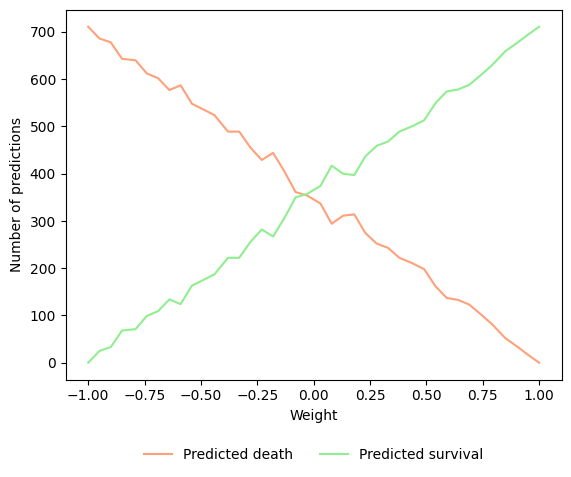

In [29]:
# Listing Plot the distribution of predictions
import matplotlib.pyplot as plt
import matplotlib

# create a graph for the number of predicted deaths
deaths, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    'lightsalmon', # color of the graph
    label='Predicted death'
)

# create a graph for the number of predicted survivals
survivals, = plt.plot(
    weights, # point at x-axis
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    'lightgreen', # color of the graph
    label='Predicted survival'
)

plt.legend(handles=[deaths, survivals],loc='upper center',
    bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

In [30]:
# Listing Metrics of the hypocrite classifier
l_precision = list(map(lambda step: precision_score(train_labels, l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

/workspaces/binary_classifiers/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In these four lines, we calculate the four metrics
at each step. Let's visualize them.

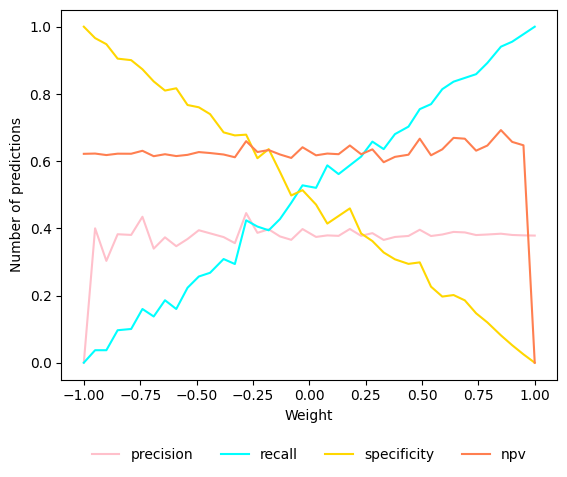

In [31]:
# Listing Plot the performance measures
m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")

plt.legend(
    handles=[m_precision, m_recall, m_specificity, m_npv],
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    framealpha=0.0,
    ncol=4)

plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

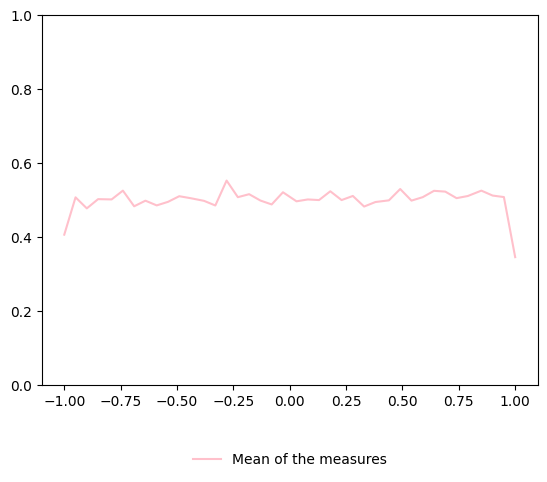

In [32]:
# Listing Calculating the mean of the measures
l_mean = list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall, l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")

plt.legend(handles=[m_mean],loc='upper center',
    bbox_to_anchor=(0.5, -0.15),framealpha=0.0)
plt.ylim(0, 1)
plt.show()

In [33]:
# Listing A reusable function to unmask the hypocrite classifier
def classifier_report(name, run, classify, input, labels):
    cr_predictions = run(classify, input)
    cr_cm = confusion_matrix(labels, cr_predictions)

    cr_precision = precision_score(labels, cr_predictions)
    cr_recall = recall_score(labels, cr_predictions)
    cr_specificity = specificity(cr_cm)
    cr_npv = npv(cr_cm)
    cr_level = 0.25*(cr_precision + cr_recall + cr_specificity + cr_npv)

    print('The precision score of the {} classifier is {:.2f}'
        .format(name, cr_precision))
    print('The recall score of the {} classifier is {:.2f}'
        .format(name, cr_recall))
    print('The specificity score of the {} classifier is {:.2f}'
        .format(name, cr_specificity))
    print('The npv score of the {} classifier is {:.2f}'
        .format(name, cr_npv))
    print('The information level is: {:.2f}'
        .format(cr_level))

In [34]:
# Listing The report of the random classifier
classifier_report(
    "Random PQC", 
    run,
    classify,
    train_input,
    train_labels)

The precision score of the Random PQC classifier is 0.35
The recall score of the Random PQC classifier is 0.46
The specificity score of the Random PQC classifier is 0.48
The npv score of the Random PQC classifier is 0.59
The information level is: 0.47
